<a href="https://colab.research.google.com/github/satyamdubey2271/UBER-data-analysis/blob/main/uber_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Data = pd.read_csv('UberDataset.csv')
Data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


Data Cleaning

In [ ]:
Data.fillna('not',inplace=True)
Data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,not
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
Data['START_DATE'] = pd.to_datetime(Data['START_DATE'],errors='coerce')
Data['END_DATE'] = pd.to_datetime(Data['END_DATE'],errors='coerce')
Data.head(25)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit


In [ ]:
from datetime import datetime
Data['date'] = pd.DatetimeIndex(Data['START_DATE']).date
Data['time'] = pd.DatetimeIndex(Data['START_DATE']).hour
Data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,hour,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,14.0


In [ ]:
Data['day-night'] = pd.cut(x=Data['time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])
Data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,hour,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,14.0,Afternoon


In [ ]:
Data.dropna(inplace=True)
Data.shape

(413, 11)

In [ ]:
Data['MONTH'] = pd.DatetimeIndex(Data['START_DATE']).month
month_label={1.0:'Jan',2.0:'Feb',3.0:'Mar',4.0:'Apr',
              5.0:'May',6.0:'Jun',7.0:'Jul',8.0:'Aug',
              9.0:'Sep',10.0:'Oct',11.0:'Nov',12.0:'Dec'}
Data["MONTH"] = Data.MONTH.map(month_label)

mon = Data.MONTH.value_counts(sort=False)
Data




,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,hour,time,day-night,Month,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,21.0,Night,1,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,1.0,Morning,1,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,20.0,Night,1,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,17.0,Evening,1,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,14.0,Afternoon,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,13.0,Afternoon,12,Dec
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,13.0,Afternoon,12,Dec
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,14.0,Afternoon,12,Dec
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,17.0,Evening,12,Dec


Data Visualization

In which category people book the most UBER rides

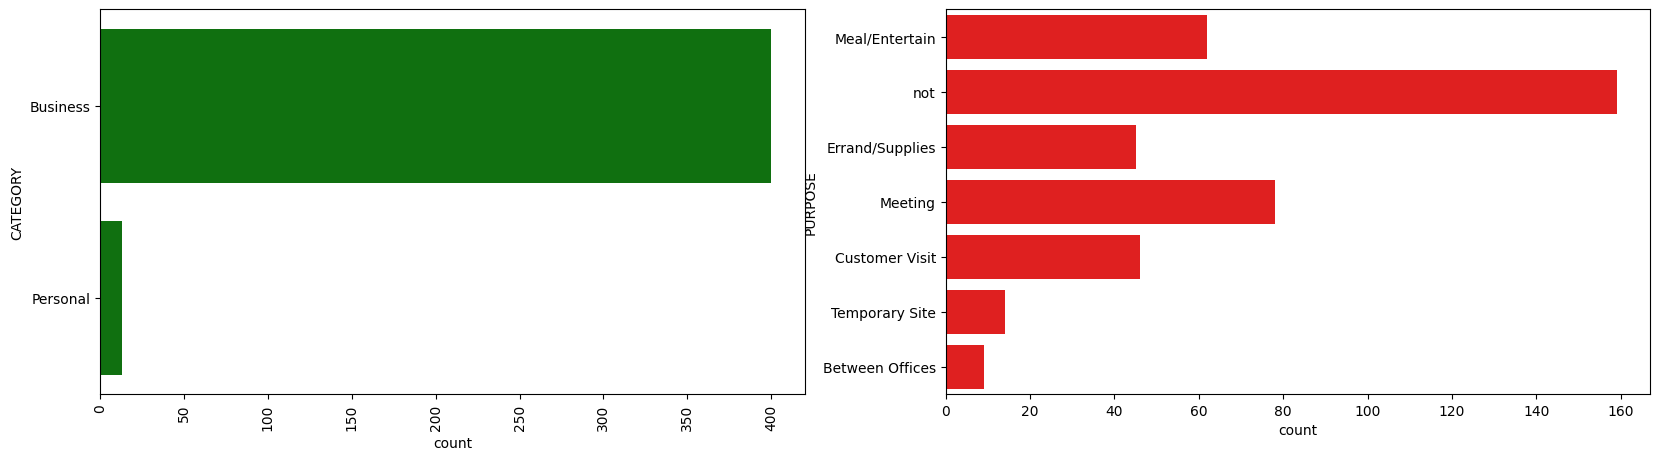

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(Data['CATEGORY'],color='g')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(Data['PURPOSE'],color='r')
plt.show()

One which time people are book UBER ride most

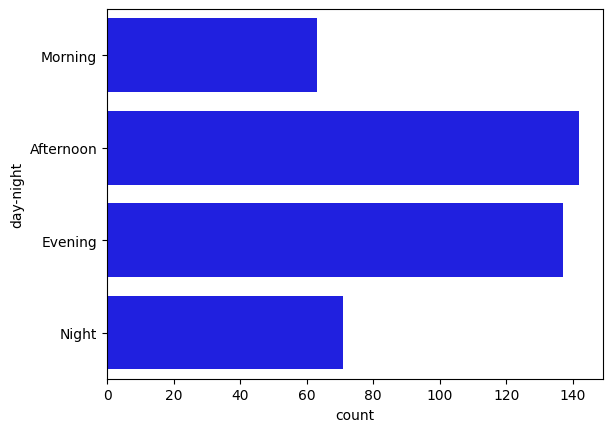

In [ ]:
sns.countplot(Data['day-night'],color='b')
plt.show()

One whose Month the uber ride book less frequently

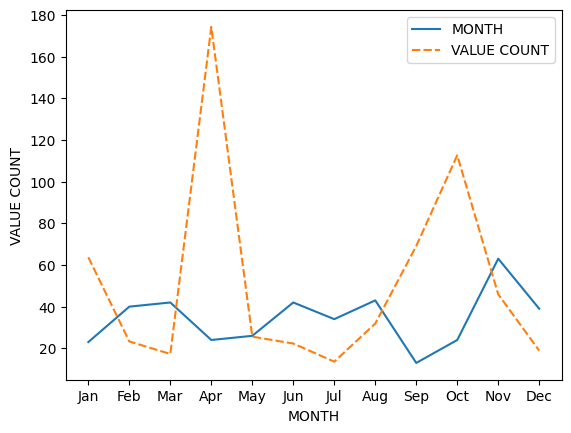

In [ ]:
df = pd.DataFrame({
    "MONTH": mon,
    "VALUE COUNT":Data.groupby('MONTH',sort=False)['MILES'].max()
})
p = sns.lineplot(data=df)
p.set(xlabel="MONTH",ylabel="VALUE COUNT")
plt.show()

Insert day column in uber dataset

In [ ]:
Data['DAY'] = Data.START_DATE.dt.weekday

day_label = {
    0:'Mon',1:'Tue',2:'wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'
}
Data['DAY'] = Data['DAY'].map(day_label)
Data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,hour,time,day-night,Month,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,21.0,Night,1,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,1.0,Morning,1,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,20.0,Night,1,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,17.0,Evening,1,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,14.0,Afternoon,1,Jan,wed


One whose day of the week the UBER ride has  book most

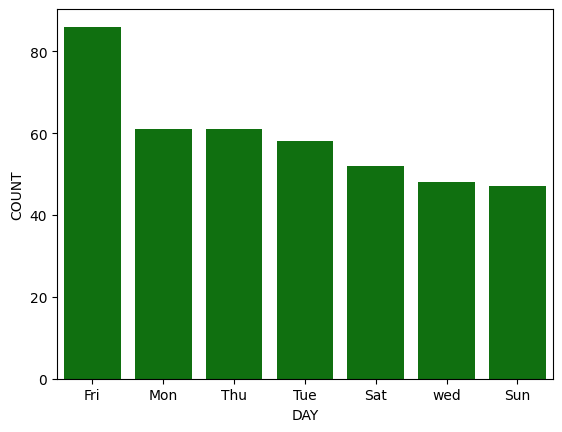

In [ ]:
day_label=Data.DAY.value_counts()

sns.barplot(x=day_label.index, y=day_label,color='g')
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.show()

Graph of miles in UBER ride

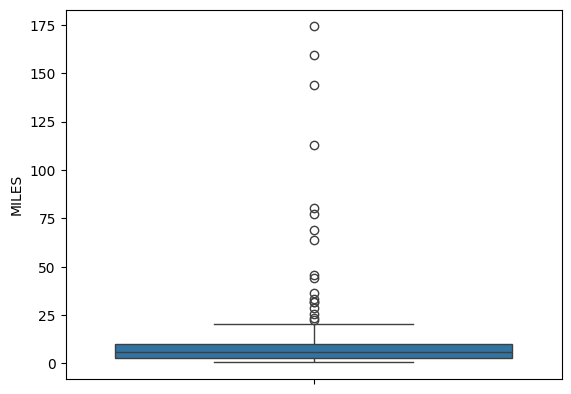

In [ ]:
sns.boxplot(Data['MILES'])
plt.show()

In 100 mile how many people are usally book as a UBER

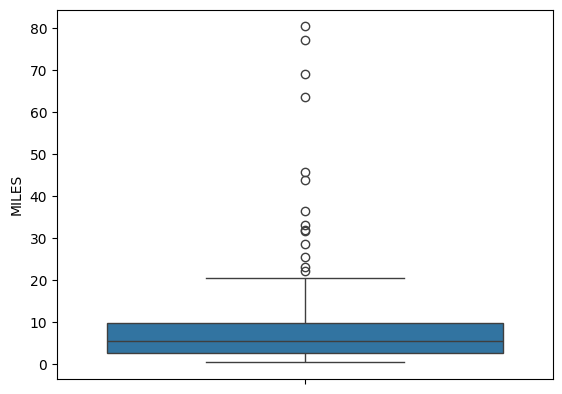

In [ ]:
sns.boxplot(Data[Data['MILES']<100]['MILES'])
plt.show()

In 40 mile how many people are usally book as a UBER

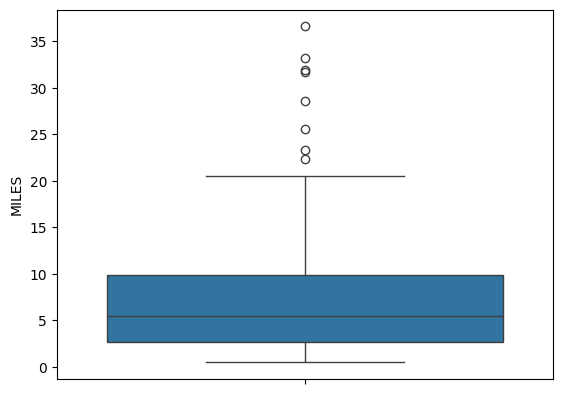

In [ ]:
sns.boxplot(Data[Data['MILES']<40]['MILES'])
plt.show()

How many miles do people are usually book a cab for through UBER

<ipython-input-88-4b4d9e2264b9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[Data['MILES']<40]['MILES'])


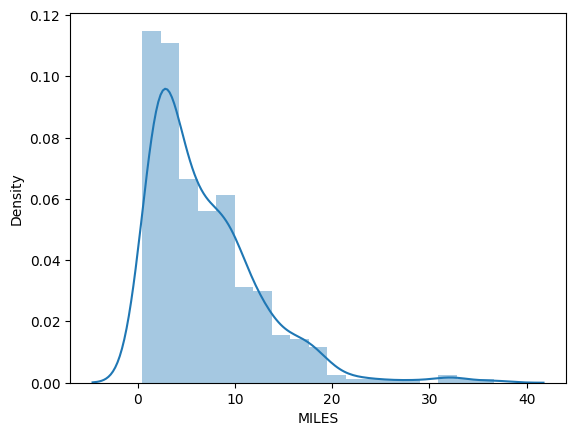

In [ ]:
sns.distplot(Data[Data['MILES']<40]['MILES'])
plt.show()